In [2]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("/content/drive/My Drive/Data/wikipedia.csv")
data.cases

0           42
1           57
2           85
3          111
4          175
        ...   
138    3585701
139    3651090
140    3714681
141    3770577
142    3834073
Name: cases, Length: 143, dtype: int64

In [4]:
confirmed = data.cases

In [5]:
x = np.arange(len(confirmed))
x = add_constant(x)

In [6]:
#Logistics starting
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b
#above Logistic formula

In [7]:
confirmed = np.array(confirmed)
x = x[:, 1]

In [8]:
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x[:122], confirmed[:122])
#the calculation of the a, b, c, and d is based on the data. 
#The more data we put in, 
#the more accurate these coefficients/constants can make the model.

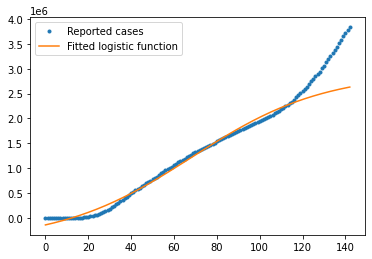

In [9]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_, d_ = logistic_params
    x = np.arange(0, len(confirmed))
    plt.plot(x, confirmed, ".", label="Reported cases")
    confirmed_pred = logistic_function(x, a_, b_, c_, d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(confirmed, (a_, b_, c_, d_))

In [10]:
r2_score(confirmed, confirmed_pred)

0.9272149298473987

In [11]:
logistic_function(x, a_, b_, c_, d_)
#Yes, the negative numbers are part of the function-logistic functions can go below zero
#But will definitely change if we change the amount of data input


array([-139938.84533042, -130057.97180045, -119917.97937329,
       -109514.09488998,  -98841.5788348 ,  -87895.73416325,
        -76671.91556028,  -65165.53912908,  -53372.09250835,
        -41287.14541474,  -28906.36060416,  -16225.505244  ,
         -3240.46268546,   10052.7553773 ,   23657.9963773 ,
         37578.95399305,   51819.15493727,   66381.94544106,
         81270.47746206,   96487.69464848,  112036.3180943 ,
        127918.83192439,  144137.46875203,  160694.19505464,
        177590.69651723,  194828.36339647,  212408.27596178,
        230331.19007308,  248597.522958  ,  267207.33925434,
        286160.33738626,  305455.83634527,  325092.76294903,
        345069.63965305,  365384.57299158,  386035.24272509,
        407018.8917722 ,  428332.31700394,  449971.86097768,
        471933.40468697,  494212.36140171,  516803.67167087,
        539701.79955691,  562900.73016724,  586393.96854413,
        610174.53996902,  634234.99173187,  658567.39640992,
        683163.35669304,

In [12]:
len(logistic_function(x, a_, b_, c_, d_))

143

In [13]:
from numpy import savetxt
savetxt('Logistic_Predictions_143.csv', logistic_function(x, a_, b_, c_, d_), delimiter=',')